# Boston Housing Price Prediction ML Project


## 1. Importing Required Liberaries

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## 2. Data Loading and Preprocessin

In [2]:
# loading the data set
# file_path = r'D:\Local Disk\_python_prog\awfera ML\Boston Housing ML\housing.csv'
df = pd.read_csv('/kaggle/input/bostonhoustingmlnd/housing.csv')
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


## 3. Data Understanding and Preprocessing

In [3]:
# Viewing dataset
print("\nDataset Overview")
print(df.head())

print("\nColumn Names")
print(df.columns)


Dataset Overview
      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

Column Names
Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

## 4. Data Visualization

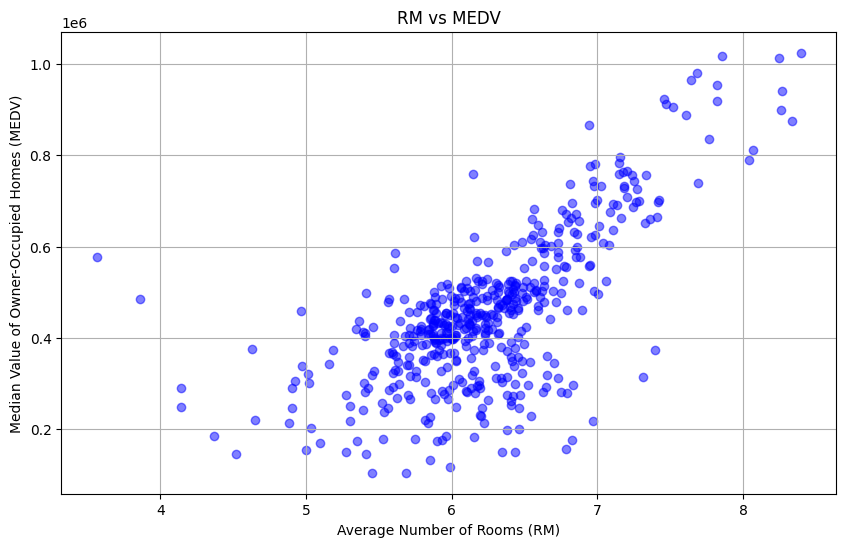

In [6]:
# ploting the dataset
plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['MEDV'], color='blue', alpha=0.5)
plt.title('RM vs MEDV')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.grid()
plt.show()


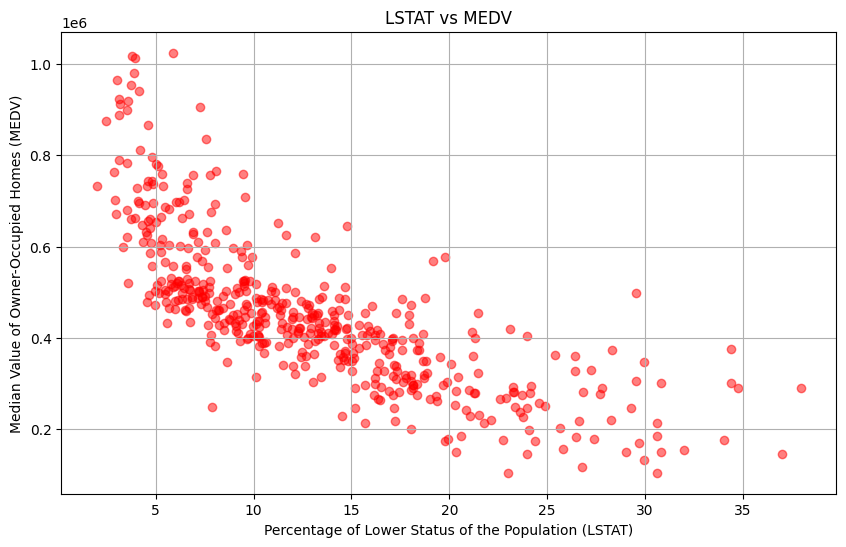

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['LSTAT'], df['MEDV'], color='red', alpha=0.5)
plt.title('LSTAT vs MEDV')
plt.xlabel('Percentage of Lower Status of the Population (LSTAT)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.grid()
plt.show()


## 5. Data Splitting and Model Training

In [8]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=['MEDV']) # Feature matrix excluding target variable
y = df['MEDV']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 6. Regression Models Training

### 6.1 Define models to test

In [9]:
# Importing various regression models from sklearn
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Defining a dictionary to hold the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100,100), 
                                         max_iter=1000, random_state=42),
}

### 6.2 Train, predict, and evaluate each model

In [10]:
# Evaluating the models
from sklearn.metrics import mean_squared_error, r2_score

# List to store results
results = []

# Loop through each model, train, predict and evaluate
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        "Model": name,
        "MSE": mse,
        "R2 Score": r2
    })


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### 6.3 Convert results into a DataFrame for comparison

In [11]:
# Creating a DataFrame to display results
results_df = pd.DataFrame(results)

# Sort by best R2 score (higher is better)
results_df = results_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

# Display the table
print(results_df)



                   Model           MSE  R2 Score
0          Random Forest  3.245169e+09  0.852342
1      Gradient Boosting  3.359780e+09  0.847127
2    Logistic Regression  6.549570e+09  0.701989
3       Ridge Regression  6.787780e+09  0.691150
4       Lasso Regression  6.789025e+09  0.691093
5      Linear Regression  6.789026e+09  0.691093
6  ElasticNet Regression  6.796793e+09  0.690740
7                    SVR  2.238266e+10 -0.018431
8   Neural Network (MLP)  2.624065e+10 -0.193973


### 6.4 Print the best model

In [12]:
# Printing the best model based on R2 score
best_model = results_df.iloc[0]
print(f"\n✅ Best Model: {best_model['Model']}")
print(f"   R2 Score: {best_model['R2 Score']:.4f}")
print(f"   MSE: {best_model['MSE']:.4f}")


✅ Best Model: Random Forest
   R2 Score: 0.8523
   MSE: 3245169433.5000


### Visualize the R² scores of all regression models in a bar chart

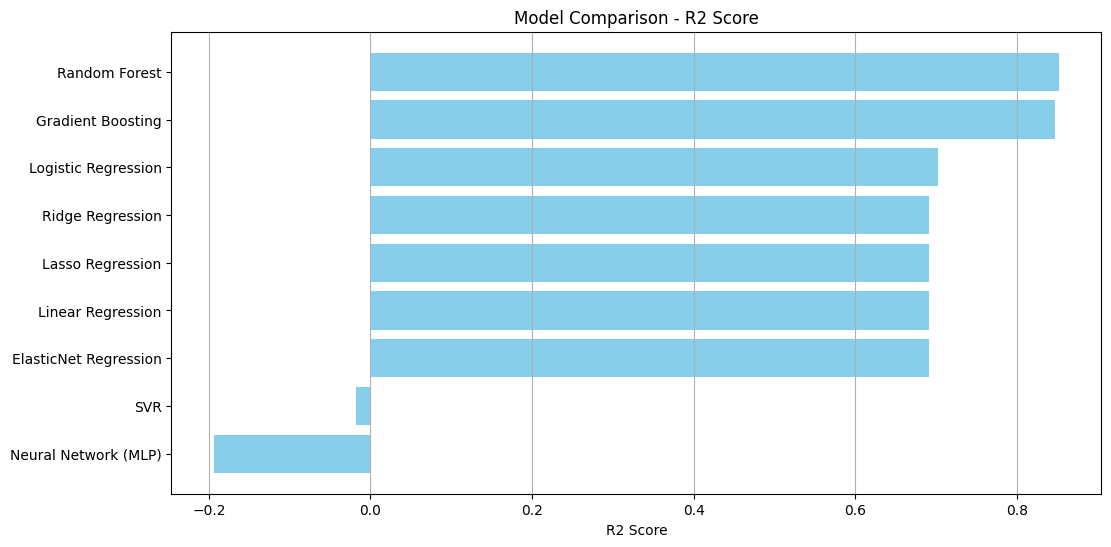

In [13]:
import matplotlib.pyplot as plt

# Plotting the results in bar plot for R2 Score
plt.figure(figsize=(12,6))
plt.barh(results_df['Model'], results_df['R2 Score'], color='skyblue')
plt.xlabel('R2 Score')
plt.title('Model Comparison - R2 Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.grid(axis='x')
plt.show()


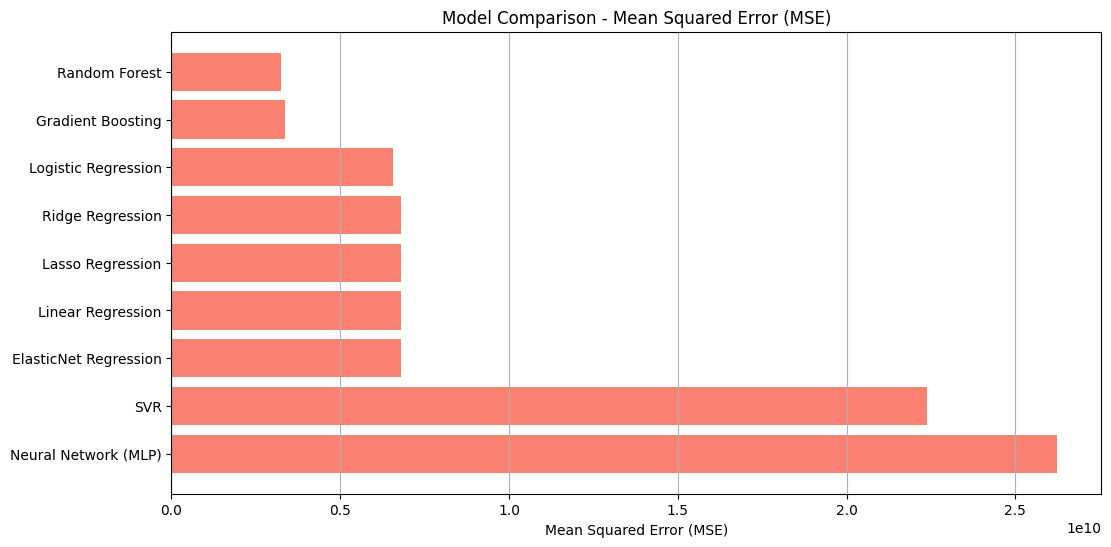

In [14]:
# Visualizing the MSE

plt.figure(figsize=(12,6))
plt.barh(results_df['Model'], results_df['MSE'], color='salmon')
plt.xlabel("Mean Squared Error (MSE)")
plt.title("Model Comparison - Mean Squared Error (MSE)")
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.grid(axis='x')
plt.show()


## 7. Saving Results 

### 7.1 Save a Combined Chart to PNG

In [15]:
# Save the combined R² + MSE chart as image
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Left: R² Score ---
axes[0].barh(results_df["Model"], results_df["R2 Score"], color="skyblue")
axes[0].set_xlabel("R² Score")
axes[0].set_title("R² Score by Model")
axes[0].invert_yaxis()
axes[0].text(best_model["R2 Score"], 0, 
             f"✅ {best_model['Model']} ({best_model['R2 Score']:.4f})",
             va="center", ha="left", fontsize=10, color="green")

# --- Right: MSE ---
axes[1].barh(results_df["Model"], results_df["MSE"], color="salmon")
axes[1].set_xlabel("Mean Squared Error (MSE)")
axes[1].set_title("MSE by Model")
axes[1].invert_yaxis()
axes[1].text(best_model["MSE"], 0, 
             f"✅ {best_model['Model']} (MSE: {best_model['MSE']:.4f})",
             va="center", ha="left", fontsize=10, color="darkred")

plt.tight_layout()
plt.savefig("model_comparison.png", dpi=300, bbox_inches="tight")
plt.close()

print("✅ Chart saved as model_comparison.png")


/tmp/ipykernel_13/2323299767.py:22: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13/2323299767.py:23: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.savefig("model_comparison.png", dpi=300, bbox_inches="tight")


✅ Chart saved as model_comparison.png


### 7.2 Save PDF Report

In [16]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import Table, TableStyle
from reportlab.lib import colors

# Create PDF
pdf_file = "model_report.pdf"
c = canvas.Canvas(pdf_file, pagesize=letter)

# Title
c.setFont("Helvetica-Bold", 16)
c.drawString(200, 750, "Regression Model Comparison Report")

# Convert DataFrame to list of lists for ReportLab table
data_table = [results_df.columns.to_list()] + results_df.round(4).values.tolist()

# Table
table = Table(data_table, colWidths=[150, 150, 150])
table.setStyle(TableStyle([
    ("BACKGROUND", (0,0), (-1,0), colors.grey),
    ("TEXTCOLOR", (0,0), (-1,0), colors.whitesmoke),
    ("ALIGN", (0,0), (-1,-1), "CENTER"),
    ("GRID", (0,0), (-1,-1), 0.5, colors.black),
    ("FONTNAME", (0,0), (-1,0), "Helvetica-Bold"),
]))
table.wrapOn(c, 30, 600)
table.drawOn(c, 30, 500)

# Add Chart Image
c.drawImage("model_comparison.png", 80, 200, width=400, height=250)

# Footer
c.setFont("Helvetica", 10)
c.drawString(200, 100, f"✅ Best Model: {best_model['Model']} (R²={best_model['R2 Score']:.4f}, MSE={best_model['MSE']:.4f})")

c.save()

print("✅ PDF report saved as model_report.pdf")


ModuleNotFoundError: No module named 'reportlab'

## 8. Hyperparameter Tuning

### 8.1 Random Forest Regressor 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],   # number of trees
    'max_depth': [None, 10, 20, 30],   # tree depth
    'min_samples_split': [2, 5, 10],   # min samples to split a node
    'min_samples_leaf': [1, 2, 4],     # min samples in each leaf
    'max_features': ['auto', 'sqrt']   # number of features considered
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV for tuning
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,          # 5-fold cross validation
    n_jobs=-1,     # use all cores
    verbose=2,
    scoring='r2'   # optimize for R²
)

# Fit the model
rf_grid.fit(X_train, y_train)

print("Best Parameters (Random Forest):", rf_grid.best_params_)
print("Best R² Score (CV):", rf_grid.best_score_)

# Evaluate on test set
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Test MSE:", mean_squared_error(y_test, y_pred_rf))
print("Test R²:", r2_score(y_test, y_pred_rf))
